In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-screen-time/Screentime - App Details.csv
/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv
/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - App Details.csv")
df.head()
print(len(df))
print(df.info())
x_name, y_name = "Notifications", "Usage"
y = df[y_name]
X = df[[x_name]]

# 결측치 처리 # 전체 데이터프레임의 각 컬럼별 결측치 
print(f"결측치 개수: {X.isna().sum()}")
print(f"결측치 개수: {y.isna().sum()}")


54
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None
결측치 개수: Notifications    0
dtype: int64
결측치 개수: 0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
model = LinearRegression()
model

LinearRegression()

In [5]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

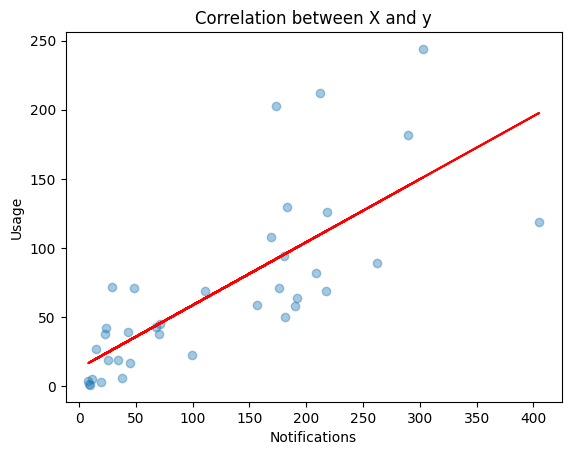

In [6]:
%matplotlib inline
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams["font.family"] = "sans-serif"
plt.scatter(X_train, y_train, alpha=0.4)
plt.xlabel(x_name)
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel(y_name)
plt.title("Correlation between X and y")
plt.show()

In [7]:
print("편향(절편) : ", model.intercept_)
print("가중치 : ", model.coef_)
print("훈련데이터셋에 대한 모델의 성능점수 출력 : ", model.score(X_train, y_train))
print("테스트 데이터셋에 대한 모델의 성능점수 출력 : ", model.score(X_test, y_test))
print("평균절대오차 MAE : ", mean_absolute_error(y_test, y_pred))
print("평균 절댓값 백분율 오차 : ", mean_absolute_percentage_error(y_test, y_pred))
print("평균 제곱 오차 : ", mean_squared_error(y_test, y_pred))

편향(절편) :  13.089230829534614
가중치 :  [0.45576676]
훈련데이터셋에 대한 모델의 성능점수 출력 :  0.5697607403775544
테스트 데이터셋에 대한 모델의 성능점수 출력 :  0.6775907775964982
평균절대오차 MAE :  22.28092246257485
평균 절댓값 백분율 오차 :  4.718828041358576
평균 제곱 오차 :  794.5301154924882


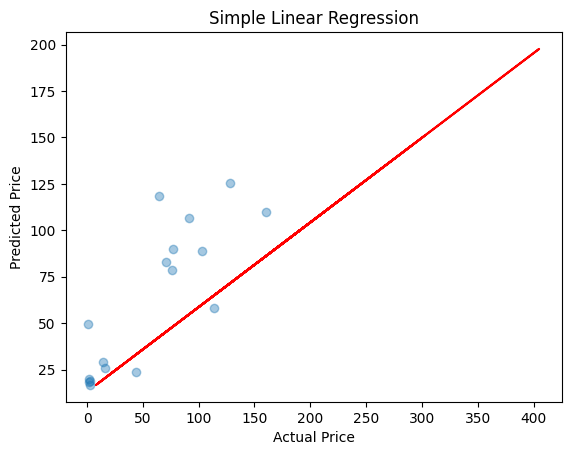

In [8]:
plt.scatter(y_test, y_pred, alpha=0.4)
    # alpha : 산점도의 투명도 조절
plt.xlabel("Actual Price")
plt.plot(X, model.predict(X), color='red')
plt.ylabel("Predicted Price")
plt.title("Simple Linear Regression")
plt.show()

In [9]:
# Notificatins 와 Times opened
df = pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - App Details.csv")
df.head()
print(len(df))
print(df.info())
x_name, y_name = "Notifications", "Times opened"
y = df[y_name]
X = df[[x_name]]

# 결측치 처리 # 전체 데이터프레임의 각 컬럼별 결측치 
print(f"결측치 개수: {X.isna().sum()}")
print(f"결측치 개수: {y.isna().sum()}")


54
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None
결측치 개수: Notifications    0
dtype: int64
결측치 개수: 0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

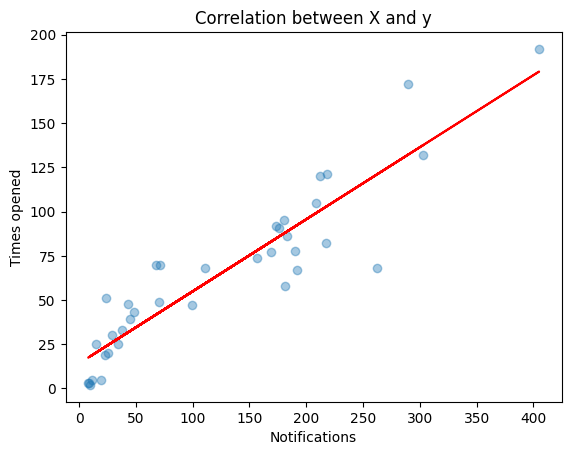

In [12]:
%matplotlib inline
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams["font.family"] = "sans-serif"
plt.scatter(X_train, y_train, alpha=0.4)
plt.xlabel(x_name)
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel(y_name)
plt.title("Correlation between X and y")
plt.show()

In [13]:
print("편향(절편) : ", model.intercept_)
print("가중치 : ", model.coef_)
print("훈련데이터셋에 대한 모델의 성능점수 출력 : ", model.score(X_train, y_train))
print("테스트 데이터셋에 대한 모델의 성능점수 출력 : ", model.score(X_test, y_test))
print("평균절대오차 MAE : ", mean_absolute_error(y_test, y_pred))
print("평균 절댓값 백분율 오차 : ", mean_absolute_percentage_error(y_test, y_pred))
print("평균 제곱 오차 : ", mean_squared_error(y_test, y_pred))

편향(절편) :  14.172523668379831
가중치 :  [0.40748652]
훈련데이터셋에 대한 모델의 성능점수 출력 :  0.8415768971864304
테스트 데이터셋에 대한 모델의 성능점수 출력 :  0.602982507276155
평균절대오차 MAE :  20.879806391418757
평균 절댓값 백분율 오차 :  0.9713804868600429
평균 제곱 오차 :  633.8844481924637


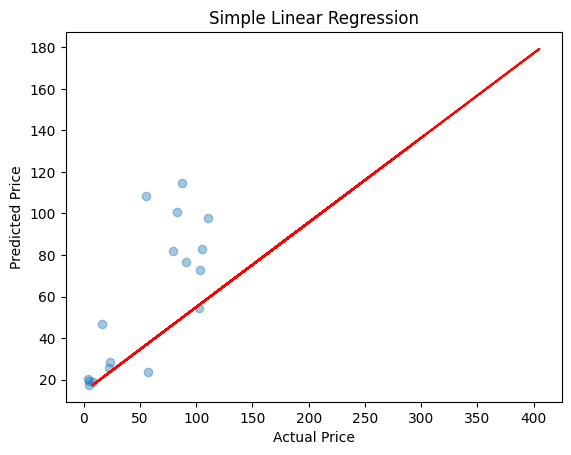

In [14]:
plt.scatter(y_test, y_pred, alpha=0.4)
    # alpha : 산점도의 투명도 조절
plt.xlabel("Actual Price")
plt.plot(X, model.predict(X), color='red')
plt.ylabel("Predicted Price")
plt.title("Simple Linear Regression")
plt.show()